## Blue print

1. Check data shape and type.
2. Convert chracteristic values to numbers.
3. Split training dataset to *ourtrain* and *ourtest*.
4. Dimensionality reduction.
5. Try various models(logistic regression, decision tree, random forest, SVM, KNN, Naive Bayes).
6. Apply to the test dataset.


## 1. Data Investigation

In [1]:
# Import packages
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Show all columns in pandas DataFrame
pd.set_option("display.max_columns", None)      

In [2]:
# Load dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
train.head()

(900000, 33)


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


* id(int64): 0, 1, 2, ..., 899999 (ordered)
* f_00(float64): -4.59 ~ 4.74
* f_01(float64): -4.68 ~ 4.81
* f_02(float64): -4.64 ~ 4.96 
* f_03(float64): -4.65 ~ 4.45
* f_04(float64): -4.74 ~ 4.94
* f_05(float64): -4.75 ~ 4.97
* f_06(float64): -4.84 ~ 4.82
* f_07(int64): 0, 1, 2, ..., 15 (not ordered)
* f_08(int64): 0, 1, 2, ..., 16 (not ordered)
* f_09(int64): 0, 1, 2, ..., 14 (not ordered)
* f_10(int64): 0, 1, 2, ..., 14 (not ordered)
* f_11(int64): 0, 1, 2, ..., 13 (not ordered)
* f_12(int64): 0, 1, 2, ..., 16 (not ordered)
* f_13(int64): 0, 1, 2, ..., 12 (not ordered)
* f_14(int64): 0, 1, 2, ..., 14 (not ordered)
* f_15(int64): 0, 1, 2, ..., 14 (not ordered)
* f_16(int64): 0, 1, 2, ..., 15 (not ordered)
* f_17(int64): 0, 1, 2, ..., 14 (not ordered)
* f_18(int64): 0, 1, 2, ..., 13 (not ordered)
* f_19(float64): -11.28 ~ 12.07
* f_20(float64): -11.25 ~ 11.47
* f_21(float64): -13.31 ~ 14.45
* f_22(float64): -11.85 ~ 11.34
* f_23(float64): -12.30 ~ 12.24
* f_24(float64): -11.41 ~ 12.38
* f_25(float64): -11.91 ~ 12.52
* f_26(float64): -14.30 ~ 12.91
* f_27(object): 'AAAAAAABAB', ..., 'BMBDEADPAC' (-> 10 digits)
* f_28(float64): -1229.75 ~ 1229.56
* f_29(int64): 0, 1
* f_30(int64): 0, 1, 2
* target(int64): 0, 1

In [4]:
print(test.shape)
test.head()

(700000, 32)


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


#### - Correlation

In [5]:
cor = round(train.corr(), 2)
# cor[((cor > 0.4) | (cor < -0.4)) & (cor != 1)].count()  # no correlation was found

## 2. Numerize *f_27* column

In [6]:
# Return 'n'th character
def nth_char(column, n):
    count = 1
    nth = []
    for characters in column:
        for char in characters:
            if count == n:
                nth.append(char)
                count = 1
                break
            else:
                count += 1

    return nth

In [7]:
# Split the letters
f_27_01 = np.array(nth_char(train.f_27, 1))
f_27_02 = np.array(nth_char(train.f_27, 2))
f_27_03 = np.array(nth_char(train.f_27, 3))
f_27_04 = np.array(nth_char(train.f_27, 4))
f_27_05 = np.array(nth_char(train.f_27, 5))
f_27_06 = np.array(nth_char(train.f_27, 6))
f_27_07 = np.array(nth_char(train.f_27, 7))
f_27_08 = np.array(nth_char(train.f_27, 8))
f_27_09 = np.array(nth_char(train.f_27, 9))
f_27_10 = np.array(nth_char(train.f_27, 10))

In [8]:
# Create DataFrame
dff_27 = pd.DataFrame({"f_27_01":f_27_01, "f_27_02":f_27_02, "f_27_03":f_27_03, "f_27_04":f_27_04, 
                "f_27_05":f_27_05, "f_27_06":f_27_06, "f_27_07":f_27_07, "f_27_08":f_27_08, 
                "f_27_09":f_27_09, "f_27_10":f_27_10})

In [9]:
print(dff_27.shape)
dff_27.head()

(900000, 10)


,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
0,A,B,A,B,D,A,D,B,A,B
1,A,C,A,C,C,A,D,C,E,B
2,A,A,A,E,A,B,C,K,A,D
3,B,D,B,B,A,A,C,B,C,B
4,B,D,B,C,B,B,C,H,F,E


In [10]:
# Data Investigate
print("f_27_01: ", dff_27.f_27_01.unique())
print("f_27_02: ", dff_27.f_27_02.unique())
print("f_27_03: ", dff_27.f_27_03.unique())
print("f_27_04: ", dff_27.f_27_04.unique())
print("f_27_05: ", dff_27.f_27_05.unique())
print("f_27_06: ", dff_27.f_27_06.unique())
print("f_27_07: ", dff_27.f_27_07.unique())
print("f_27_08: ", dff_27.f_27_08.unique())
print("f_27_09: ", dff_27.f_27_09.unique())
print("f_27_10: ", dff_27.f_27_10.unique())

f_27_01:  ['A' 'B']
f_27_02:  ['B' 'C' 'A' 'D' 'E' 'G' 'F' 'H' 'I' 'J' 'K' 'L' 'M' 'N']
f_27_03:  ['A' 'B']
f_27_04:  ['B' 'C' 'E' 'D' 'H' 'I' 'G' 'A' 'F' 'J' 'K' 'L' 'M' 'N' 'O']
f_27_05:  ['D' 'C' 'A' 'B' 'F' 'E' 'G' 'I' 'H' 'J' 'K' 'L' 'M' 'O']
f_27_06:  ['A' 'B']
f_27_07:  ['D' 'C' 'A' 'E' 'B' 'G' 'H' 'F' 'I' 'J' 'M' 'K' 'L' 'N' 'O']
f_27_08:  ['B' 'C' 'K' 'H' 'E' 'P' 'D' 'A' 'S' 'T' 'J' 'Q' 'N' 'R' 'G' 'M' 'F' 'O'
 'I' 'L']
f_27_09:  ['A' 'E' 'C' 'F' 'D' 'H' 'B' 'G' 'I' 'J' 'L' 'K' 'M' 'N' 'O']
f_27_10:  ['B' 'D' 'E' 'A' 'C' 'K' 'F' 'G' 'H' 'J' 'I' 'L' 'M' 'N' 'O']


In [11]:
# Numerize the split dataframe
def to_num(df):
    ref = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "H":8, "I":9, "J":10, "K":11, "L":12, 
    "M":13, "N":14, "O":15, "P":16, "Q":17, "R":18, "S":19, "T":20, "U":21, "V":22, "W":23, "X":24,
    "Y":25, "Z":26}

    df = ref[df]
    return df

dff_27 = dff_27.applymap(to_num) 
dff_27.head()

,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
0,1,2,1,2,4,1,4,2,1,2
1,1,3,1,3,3,1,4,3,5,2
2,1,1,1,5,1,2,3,11,1,4
3,2,4,2,2,1,1,3,2,3,2
4,2,4,2,3,2,2,3,8,6,5


In [12]:
# Combine with training dataset
train = pd.concat([train,dff_27], axis=1)
train = train.drop(columns=['f_27'])
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,1,2,1,2,4,1,4,2,1,2
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,1,3,1,3,3,1,4,3,5,2
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,1,1,1,5,1,2,3,11,1,4
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,2,4,2,2,1,1,3,2,3,2
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,2,4,2,3,2,2,3,8,6,5


## 3. Dimensionality Reduction (PCA)

### 3-1. Standardize Data

In [41]:
# Drop the target
attributes = train.drop(columns=["target", "id"])
# centered = attributes - attributes.mean()       # mean centering only
centered = (attributes - attributes.mean())/attributes.std()
# print(centered.var())
centered.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
0,-1.374489,0.237914,-0.244424,0.568674,-0.647036,0.839147,0.113849,-0.622798,1.849206,-0.831914,0.499628,0.778288,0.089417,-0.805874,3.299935,-0.701763,-1.343902,3.503148,1.236509,-0.004531,-0.308681,1.293854,-1.032915,0.463197,-1.000398,-0.159178,0.406221,0.284747,-0.726815,-1.224258,-0.997321,-0.644413,-1.421884,-0.619729,1.243387,-0.937278,0.375802,-1.467208,-1.264419,-0.776771
1,1.699197,-1.712871,-2.230359,-0.544197,1.113558,-1.552653,0.448561,-0.622798,0.592099,0.999916,-1.323025,0.127876,0.089417,-1.455889,-0.378664,-1.339074,1.219923,2.821798,-1.319755,-1.492375,-0.373550,0.939893,0.933406,-0.107687,-0.366301,-1.637903,-0.167974,1.580904,-0.726815,-1.224258,-0.997321,0.022778,-1.421884,0.006711,0.472758,-0.937278,0.375802,-1.291926,1.235714,-0.776771
2,1.683885,0.616078,-1.028334,0.811718,-0.608414,0.113695,-0.707991,-0.622798,-1.293562,-0.221304,2.322280,2.729524,0.656685,0.494156,-0.378664,-0.064453,-0.061989,-0.584951,1.236509,1.084625,-1.377471,-0.252717,-0.561655,-0.061588,0.139767,1.080692,-1.640164,-0.817592,-0.726815,1.217776,-0.997321,-1.311604,-1.421884,1.259589,-1.068500,1.066918,-0.228162,0.110336,-1.264419,0.433488
3,-0.118017,-0.589476,-0.805397,2.087825,0.371514,-0.129132,-0.281882,0.584806,-0.036455,-0.831914,-1.323025,-0.522536,1.791221,1.144171,0.357056,0.572858,0.578967,-1.266301,0.597443,0.333490,-0.800438,-0.880391,0.237420,-0.523254,0.849947,-1.121098,-0.390219,0.884552,-0.726815,-1.224258,1.002685,0.689969,0.703291,-0.619729,-1.068500,-0.937278,-0.228162,-1.467208,-0.014353,-0.776771
4,1.150047,-0.177876,-0.665703,-1.099782,0.468368,0.499895,0.408249,0.584806,0.592099,-1.442524,1.107178,0.778288,-1.612388,2.444201,-1.114384,0.572858,0.578967,-0.584951,-1.319755,-0.187775,0.326501,0.519165,-1.592810,-0.432422,1.034959,-1.441205,1.621061,-0.908105,-0.726815,-0.003241,1.002685,0.689969,0.703291,0.006711,-0.297871,1.066918,-0.228162,-0.415512,1.860747,1.038617


### 3-2. Eigenvalues and Eigenvectors

In [42]:
# Covariance Matrix
cov = np.dot(centered.T, centered)/(len(centered)-1)
df_cov = pd.DataFrame(cov)
df_cov.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,1.000000,-0.000303,0.001899,-0.000841,-0.000544,0.000305,-0.001312,0.000831,-0.002553,0.000078,0.000627,0.001131,-0.000196,0.000586,0.001111,-0.001298,-0.000544,0.000199,-0.001019,0.000372,-0.000023,0.001069,-0.001079,0.000269,0.001895,0.000509,0.000117,0.189369,0.000274,-0.000996,0.000235,-0.000685,-0.000720,-0.000760,0.001450,-0.001436,0.000045,-0.001796,-0.000134,-0.001201
1,-0.000303,1.000000,0.000501,-0.000833,-0.000832,0.000636,-0.000441,-0.001220,-0.000292,-0.000566,0.001240,0.001565,-0.001031,-0.000512,0.000292,-0.000508,-0.001192,0.000007,0.000341,-0.000877,0.001204,-0.001635,-0.000462,-0.000646,-0.000970,-0.000115,0.002033,0.193940,-0.000556,-0.000070,-0.002322,-0.002583,0.000254,0.001721,-0.001454,-0.000375,0.000569,-0.001881,-0.000395,-0.000083
2,0.001899,0.000501,1.000000,0.000792,0.000067,-0.001109,0.000894,0.001206,0.000339,0.001718,0.001146,-0.001822,0.001916,-0.002856,0.000251,0.000395,-0.001464,0.000896,-0.000535,-0.001172,0.000918,-0.000215,-0.000319,-0.000018,-0.000003,-0.000894,0.000574,0.209182,-0.001451,-0.000023,0.000082,0.000335,0.001339,-0.001131,-0.000697,-0.000868,-0.000372,0.000395,0.000281,0.000664
3,-0.000841,-0.000833,0.000792,1.000000,0.001049,0.002768,-0.001092,0.001114,-0.000124,0.000484,-0.000240,0.002122,0.001023,-0.001552,-0.000281,-0.002340,-0.000069,0.001437,0.001515,0.001420,0.000853,-0.000082,0.000503,0.001413,0.002854,0.001784,0.000713,0.328895,-0.000624,0.000239,-0.001446,-0.000889,0.001202,-0.001008,-0.000542,-0.000071,0.000257,0.000167,-0.000840,-0.000742
4,-0.000544,-0.000832,0.000067,0.001049,1.000000,0.000194,-0.000312,0.001227,-0.000251,0.002478,-0.003559,0.000270,0.001543,-0.001316,0.001035,0.000802,-0.000947,-0.000232,0.000427,0.000606,0.000405,0.000366,0.001751,-0.002201,0.000601,-0.001981,-0.000520,0.170484,-0.001122,0.000475,0.000092,0.002632,0.000880,-0.002735,-0.000038,-0.000906,-0.001082,-0.001669,-0.000341,0.001286


In [43]:
# Eigenvalues & Eigenvectors
eig = np.linalg.eig(cov)
print('<eigenvalues>\n', eig[0],'\n')
print('<eigenvectors>\n', eig[1])

<eigenvalues>
 [2.06155345 1.81984597 1.75430281 1.60833202 0.39299269 0.49897894
 0.55604552 1.32822964 0.59897266 1.27547893 1.25621199 1.22117752
 0.69281247 0.69871147 1.11750903 1.11196461 0.7536505  1.07715803
 0.78307789 0.80923508 0.82612637 0.83593377 0.84646001 0.84969011
 0.86868781 0.87086922 0.88994405 0.89752527 0.90779179 0.92777187
 0.92562023 0.95302468 0.97870015 1.00672656 0.99560423 1.00286852
 0.99892349 0.99925151 1.00141114 1.000828  ] 

<eigenvectors>
 [[-2.52955931e-04  2.32796768e-03 -1.31908931e-03 ...  2.92912072e-01
  -5.38177365e-01  8.65595678e-02]
 [-3.18841091e-03  3.39419076e-04  7.31743138e-04 ... -4.07950864e-01
   2.05398357e-01 -7.63494833e-01]
 [ 5.55321684e-05  6.23447223e-03  1.26966042e-03 ... -2.03764933e-01
   1.34274746e-02  3.24927817e-01]
 ...
 [ 7.62252978e-03 -2.14027192e-02  2.55196662e-01 ...  1.54347748e-02
   3.23117076e-04 -1.15605347e-02]
 [-1.63492079e-02  1.17983614e-01  1.58032020e-02 ... -2.12066031e-03
  -1.66347617e-03  7.099

### 3-3. Contribution in the Data

In [66]:
def percent_variation(n):
    '''Percent Variation of top 'n' factors'''
    trace = sum(eig[0])    # sum of all eigenvalues
    contribution = [i/trace for i in eig[0]]
    return contribution[:n]    # return the first n number of contributions

n = 5
# print(percent_variation(n))
print('Total contribution of 5 components:', round(sum(percent_variation(n)),4)*100, '%\n')

m = 20
# print(percent_variation(m))
print('Total contribution of 20 components:', round(sum(percent_variation(m)),4)*100, '%')

Total contribution of 5 components: 19.09 %

Total contribution of 20 components: 53.54 %


### 3-4.  Fit to PCA (getting a projection matrix)

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(attributes)

# How much each of the features influence the PC
k = pd.DataFrame(pca.components_, columns=list(attributes.columns))
k.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
0,0.000792,0.000812,0.000877,0.001378,0.000714,0.001239,0.000690,0.000007,-0.000001,-0.000005,-0.000008,9.009450e-07,0.000010,-0.000010,0.000007,-0.000015,-0.000008,0.000005,-0.000014,0.000003,0.000008,-8.740367e-07,4.027393e-07,-0.000001,-0.000012,0.000008,0.000003,0.999997,-0.000003,0.000003,5.001432e-07,0.000008,-5.491545e-08,-0.000005,-0.000001,-0.000003,3.953506e-07,-0.000011,-0.000003,-0.000015
1,-0.000316,-0.000328,0.000074,0.000046,-0.000280,0.000203,-0.000044,0.002035,0.000907,0.001978,-0.001193,-7.548347e-04,0.000864,-0.000182,-0.000536,0.001637,-0.000918,-0.000584,0.001538,0.034742,-0.033750,-2.655797e-02,4.137784e-02,-0.014197,-0.062886,0.048958,-0.072118,0.000010,0.000701,0.015805,1.042978e-03,0.000330,9.307687e-04,-0.002287,0.000156,0.000738,-6.818636e-04,0.991564,0.000443,0.002485
2,-0.000321,0.000267,-0.000312,-0.000156,0.000332,0.000217,0.000183,-0.005708,-0.002758,-0.010282,0.003036,4.381527e-03,-0.003996,0.001621,0.001610,-0.004572,0.001108,0.001670,-0.000379,-0.028141,-0.085981,-4.927755e-01,4.606077e-01,-0.485089,-0.131193,0.475410,-0.202482,-0.000007,-0.000749,0.094313,-5.680929e-04,0.002654,-1.093992e-03,0.008362,-0.001410,-0.000555,6.337018e-03,-0.089223,-0.002828,-0.009268
3,-0.000047,-0.000607,-0.000302,-0.000454,-0.000004,-0.000429,0.000526,0.010010,0.002607,0.008677,-0.007309,-6.281287e-03,0.006841,0.001182,-0.002572,0.006382,-0.004372,-0.001552,-0.000438,0.207984,-0.586533,-1.625953e-01,-3.829491e-02,0.318506,-0.232016,-0.230090,-0.608121,0.000006,0.000070,-0.028991,9.011276e-04,-0.000106,8.976313e-04,-0.007651,0.000284,-0.000051,-7.490740e-03,-0.072697,0.007266,0.009957
4,0.000023,0.000016,-0.000534,-0.000386,-0.000440,0.000549,0.000802,-0.007657,-0.005794,-0.014222,0.011155,7.800426e-03,-0.005263,0.003892,0.000075,-0.009620,0.006287,0.003505,-0.001865,0.472331,-0.304842,3.710635e-01,-1.833670e-01,-0.193164,-0.500341,0.332540,0.334281,-0.000009,-0.001122,0.007596,-1.871178e-03,-0.001274,-3.277983e-03,0.014335,-0.001470,-0.000755,1.282247e-02,-0.035868,-0.005752,-0.015661


### 3-5. Projection (transforming the original data via projection matrix)

In [69]:
data_pca = pca.transform(attributes)
data_pca_df = pd.DataFrame(data_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
data_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,67.990337,-8.447181,-2.619051,0.977608,3.406858
1,377.472639,-7.493305,-0.912615,1.182583,-1.617117
2,-195.217030,1.184690,2.078739,4.195123,1.715570
3,211.207978,-8.304496,1.393134,2.616065,-1.699461
4,-216.830430,-3.193091,-4.544735,-2.976508,0.027442


### cf) Choosing the number of components

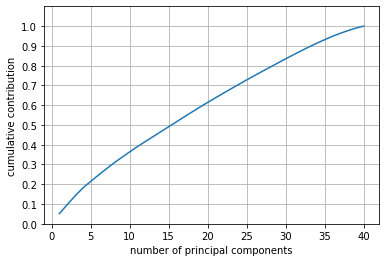

In [74]:
pca = PCA().fit(centered)

x = np.arange(1,41)
y = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize = (6, 4))
plt.plot(x, y)
plt.xlabel('number of principal components', fontsize=10)
plt.ylabel('cumulative contribution', fontsize=10)

plt.ylim(0, 1.1)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid()
plt.show()

### 3-6. Conclusion from PCA

=> Cumulative contribution is inceasing relatively monotonously. We conclude that dimension reduction is efficient.

## 4. Split training dataset

In [77]:
# Split 'train' into features(X) and target(y)
X = train.drop(columns=["target"])
y = train["target"]
print(X.shape, y.shape)

# Split each of features(X) and target(y) into train and target
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, stratify=y)
print(Xtr.shape, ytr.shape)
Xtr.head()

(900000, 41) (900000,)
(630000, 41) (630000,)


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
495765,495765,-0.604396,-1.241022,1.214139,-1.126424,-0.719717,0.523912,0.772980,7,0,4,1,3,5,2,3,3,0,0,7,-4.007584,0.079873,7.103822,-3.710500,7.770049,2.298219,-4.108233,0.558195,-203.587007,0,1,1,3,2,2,2,1,1,7,4,6
86875,86875,0.050263,0.735141,-0.026930,-1.317030,0.978249,-1.663758,-0.481695,1,3,4,3,0,3,3,1,2,2,0,5,0.188316,-0.276230,-0.794033,-3.096853,0.374103,-3.452399,-2.089530,1.437596,-81.519853,1,0,2,4,2,2,3,1,4,7,2,1
48956,48956,-0.147157,0.992112,-0.497621,0.753462,-0.564150,0.274811,-0.053711,0,1,2,1,3,4,3,6,1,1,2,1,-1.316800,1.068751,-2.239056,0.792618,-0.202696,-4.851477,4.485365,-0.568917,227.149752,0,2,1,6,2,3,1,1,4,18,1,6
877253,877253,-0.287867,1.169915,-0.001177,1.406511,-1.329836,-0.239872,0.134412,0,0,1,5,1,3,0,1,4,2,1,0,-1.000583,-1.952841,-0.656887,0.750793,-3.718661,-0.959326,4.904802,3.830466,302.051950,0,0,1,1,1,7,3,2,2,12,6,2
17699,17699,0.038937,-0.392223,0.861162,2.692872,0.068014,0.228641,1.378591,1,0,3,6,1,2,1,1,1,2,1,2,1.876933,-6.228982,0.813420,-1.394910,2.828710,-1.747010,2.030346,-0.131081,597.163367,1,0,1,3,2,4,2,2,2,3,4,1


## 5. Try Various ML Models

### 5-1. Logistic Regression

In [30]:
data_pca_df.shape

X = data_pca_df.shape

Xtr, Xte, ytr,  = train_test_split(data_pca_df.shape, test_size=0.3, stratify=train["target"])

(900000, 1)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(dataset[0:5,0],dataset[0:5,1],label='0')
ax.scatter(dataset[5:10,0],dataset[5:10,1],label='1')
leg = ax.legend();

X = hstack([ones((dataset.shape[0],1)), dataset[:,0:2] ])
y = dataset[:,2]
print(X)

### 5-2. Decision Tree

### 5-3. Random Forest

### 5-4. SVM

### 5-5. KNN

### 5-6. Naive Bayes

## 6. Apply to the test dataset